In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ImageFolderPath = "./Images/"

In [3]:
# function converting channels/Bands last to Channels first 
def convertHWCToCHW(img):
    return (img.transpose(2,0,1))
# function to set profile argument in case they are not given
def setProfile(**kwrgs):
    default  = {
    'driver': 'GTiff',
    'interleave': 'band',
    'tiled': True,
    'blockxsize': 32,
    'blockysize': 32,
    'compress': 'lzw',
    'nodata': 0,
    'dtype': np.uint8,
    **kwrgs
    }
    return default
# writing Big tiff file
def writeBigTIFF(img,profile=None, name='newBigTIFF'): 
    if profile is None:
        from rasterio.profiles import DefaultGTiffProfile
        height,width,bands=img.shape 
        profile = setProfile(height=height,width=width,count=bands)
        print(profile)
    with rasterio.open(name+'.tif','w',BigTiff='YES',**profile) as BigTiff:
        return (BigTiff.write(convertHWCToCHW(img)))
# reading TiFF file including BigTiff and returning image as well as its' profile
def readTIFF(imgPath):
    with rasterio.open(imgPath,mode='r+') as classicTiff:
        img = classicTiff.read()
        #Here we are transposing to convert the read output from CxHxW to HxWxC (compatible with matplotlib)
        img = img.transpose(1,2,0)
        return img,classicTiff.profile

# Reading simple '.tif/.tiff' file

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = get_writer_for_path(path)(path, mode, driver=driver, **kwargs)


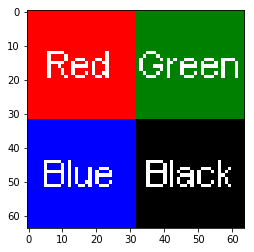

In [4]:
filePath = ImageFolderPath+'Classic.tif'
img,profile = readTIFF(filePath)
plt.imshow(img)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/rasterio/__init__.py:225: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)


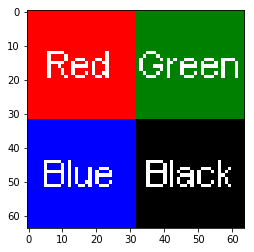

In [5]:
writeBigTIFF(img,profile,name=ImageFolderPath+"BigTIFFSample")
img,profile = readTIFF(ImageFolderPath+'BigTIFFSample.tif')
plt.imshow(img)
plt.show()